To run a cell, type `Shift` + `Return`. Run the cell below to get started

In [3]:
from workshop_utils import * 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# All Edits Example



The following query gets all of the edits (ever), joined to changesets for all objects in Haiti... it should take some time to download.

```sql
SELECT
  central_america.id, 
  geom,
  central_america.tags, changeset, updated, valid_until, version, minor_version,
  changesets.id AS c_id, 
  changesets.tags as c_tags,
  changesets.uid,
  changesets.user
  
FROM central_america

JOIN changesets on central_america.changeset = changesets.id

WHERE ST_WITHIN(
  geom , 
  ST_POLYGON('POLYGON((-72.7306 18.817, -72.0793 18.817, -72.0793 18.327, -72.7306 18.327, -72.7306 18.817))')
)```

In [4]:
edits = load_dataframe_from_s3('https://us-east-2.console.aws.amazon.com/athena/query/results/1e4d4c1e-6756-4392-8089-e61c1da4d5d8/csv')


Found file locally... Creating dataframe... done.  Found 1,107,721 rows

In [5]:
edits.head(2)

,id,geom,tags,changeset,updated,valid_until,version,minor_version,c_id,c_tags,uid,user
0,614786249,POINT (-72.3897765 18.5345663),"{source=GeoEye, building=collapsed}",3632844,2010-01-16 16:46:25.000,2013-04-29 18:29:37.000,1,0,3632844,"{comment=GeoEye tracing, created_by=JOSM/1.5 (...",12982,miscosm
1,51075915,"LINESTRING (-72.4611336 18.7646433, -72.460157...","{source=DigitalGlobe;WorldView-2, highway=serv...",3953213,2010-02-23 13:09:37.000,NaN,1,0,3953213,"{comment=new, created_by=JOSM/1.5 (2989 en)}",36894,rab


In [10]:
#Cast the date as date
edits['updated'] = edits.updated.apply(pd.Timestamp)

In [15]:
edits['date'] = edits.updated.apply(pd.Timestamp.date)

In [16]:
gb_date = edits.groupby('date').aggregate({
    'c_id':'count',
    'id':'nunique',
    'uid':'nunique'
});
gb_date.head(2)

,c_id,id,uid
date,,,
2007-03-18,1,1,1
2008-01-26,1,1,1


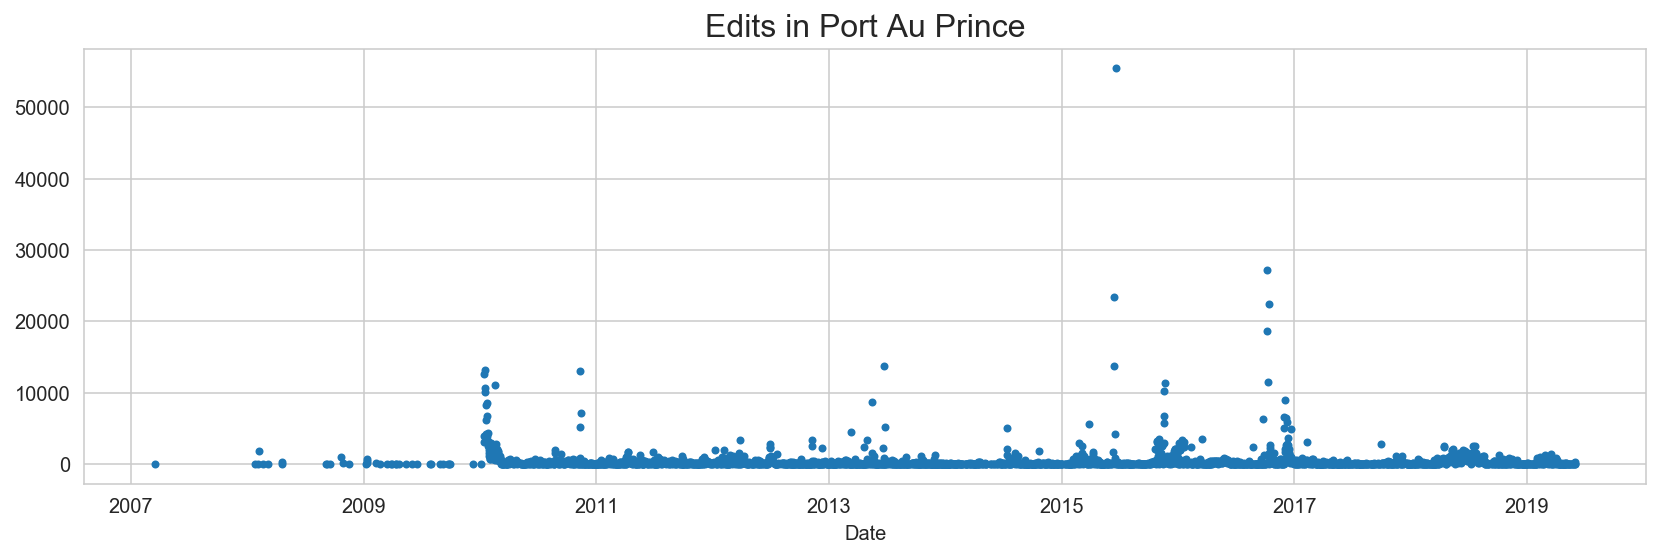

In [17]:
sns.set_style('whitegrid')
ax = gb_date['c_id'].plot(style='.', figsize=(14,4))
ax.set_xlabel("Date"); ax.set_ylabel("");
ax.set_title("Edits in Port Au Prince",fontsize=16);

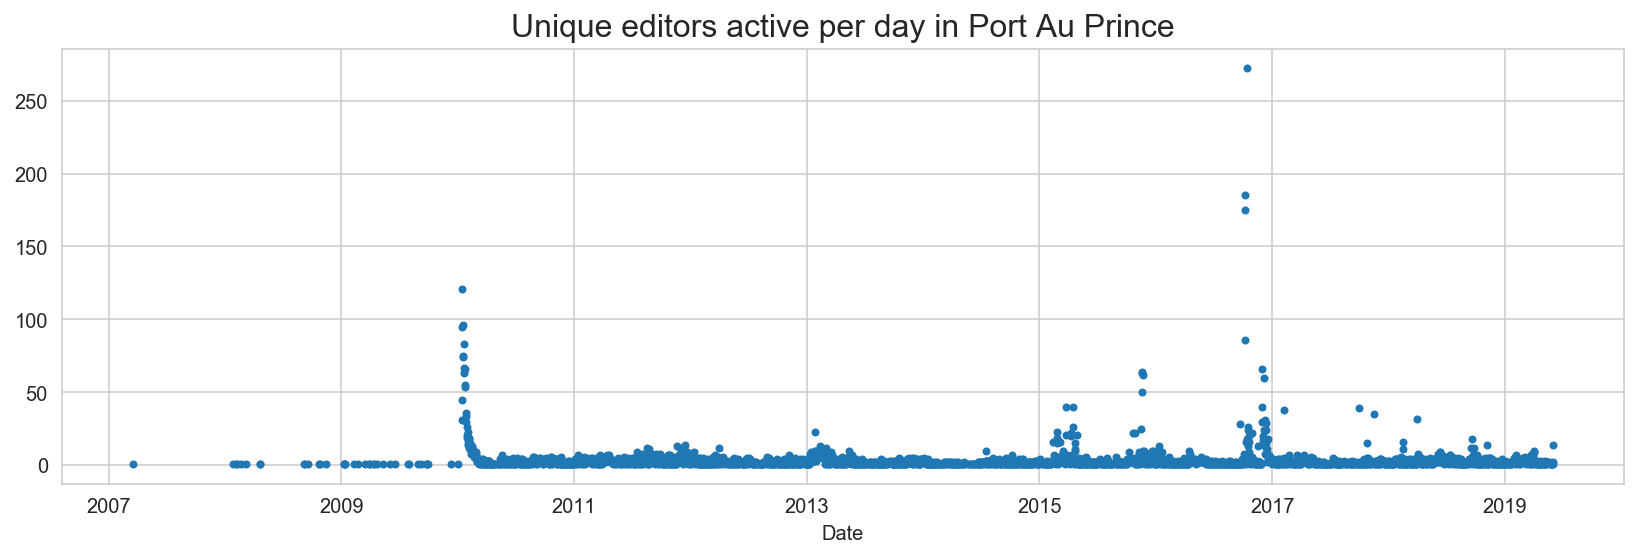

In [18]:
sns.set_style('whitegrid')
ax = gb_date['uid'].plot(style='.', figsize=(14,4))
ax.set_xlabel("Date"); ax.set_ylabel("");
ax.set_title("Unique editors active per day in Port Au Prince",fontsize=16);